In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# we can drop columns : RowNumber, CustomerId, and Surname


In [8]:
df=df.drop(columns=['RowNumber','CustomerId', 'Surname'])

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

In [11]:
df['CreditScore'].value_counts().size

460

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df['CreditScore'].dtypes

dtype('int64')

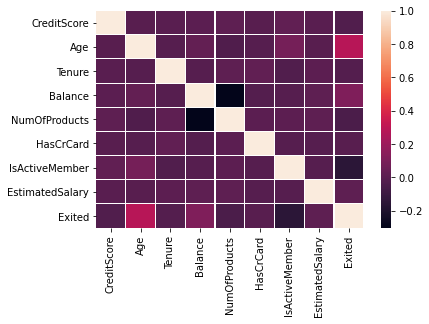

In [16]:
import seaborn as sns 
ax= sns.heatmap(df.corr(),linewidths=0.1)
# ax=sns.heatmap(df)

In [17]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

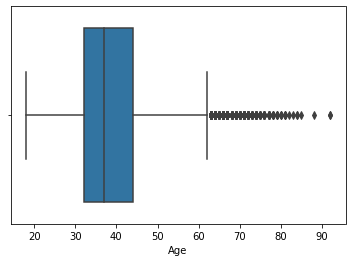

In [19]:
sns.boxplot(x=df['Age'])
plt.show()

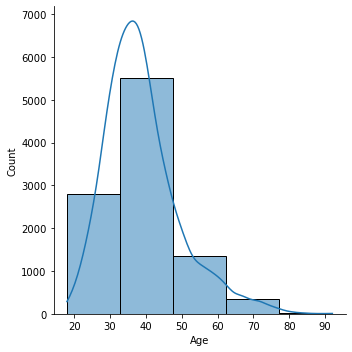

In [20]:
a=df['Age'].value_counts()
sns.displot(df['Age'], bins=5, kde=5)
plt.show()

In [21]:
df[df['Age']>60].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.098370,0.002598,-0.033429,0.042308,-0.032091,0.074222,0.024077,-0.060418
Age,0.098370,1.000000,0.055129,-0.086541,0.014526,-0.002128,0.183899,0.019164,-0.297177
Tenure,0.002598,0.055129,1.000000,0.026561,-0.032692,0.052767,-0.043195,-0.010575,-0.033769
Balance,-0.033429,-0.086541,0.026561,1.000000,-0.304653,-0.078390,-0.064241,0.046236,0.150381
NumOfProducts,0.042308,0.014526,-0.032692,-0.304653,1.000000,0.025423,0.021006,0.096075,-0.012600
HasCrCard,-0.032091,-0.002128,0.052767,-0.078390,0.025423,1.000000,-0.025088,0.056403,-0.014180
IsActiveMember,0.074222,0.183899,-0.043195,-0.064241,0.021006,-0.025088,1.000000,-0.050077,-0.645833
EstimatedSalary,0.024077,0.019164,-0.010575,0.046236,0.096075,0.056403,-0.050077,1.000000,0.019104
Exited,-0.060418,-0.297177,-0.033769,0.150381,-0.012600,-0.014180,-0.645833,0.019104,1.000000


<AxesSubplot:>

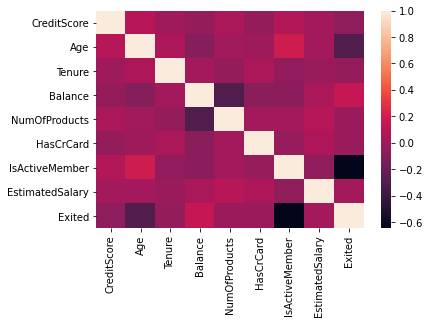

In [22]:
sns.heatmap(df[df['Age']>60].corr())

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df_age_log=np.log(df['Age'])

<AxesSubplot:xlabel='Age'>

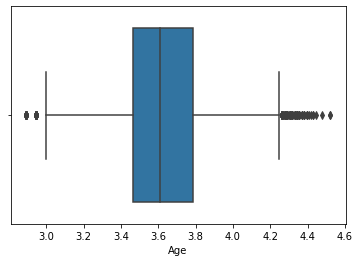

In [26]:
sns.boxplot(x=df_age_log)

<AxesSubplot:xlabel='Age'>

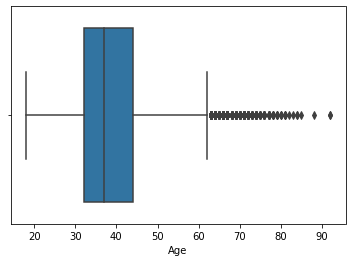

In [27]:
sns.boxplot(x=df['Age'])

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [30]:
print('Categorical Features')

catergoricals= ['Geography','Gender', 'HasCrCard','IsActiveMember','Exited'  ]
catergoricals

Categorical Features


['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [31]:
print('Numerical Features')
numericals=['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
numericals

Numerical Features


['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [32]:
print('Number of Unique values in colums:\n')
for columns in df.columns:
    print(columns,': ', df[columns].value_counts().size)

Number of Unique values in colums:

CreditScore :  460
Geography :  3
Gender :  2
Age :  70
Tenure :  11
Balance :  6382
NumOfProducts :  4
HasCrCard :  2
IsActiveMember :  2
EstimatedSalary :  9999
Exited :  2


In [33]:
for columns in catergoricals:
    print(columns,': ', df[columns].unique())

Geography :  ['France' 'Spain' 'Germany']
Gender :  ['Female' 'Male']
HasCrCard :  [1 0]
IsActiveMember :  [1 0]
Exited :  [1 0]


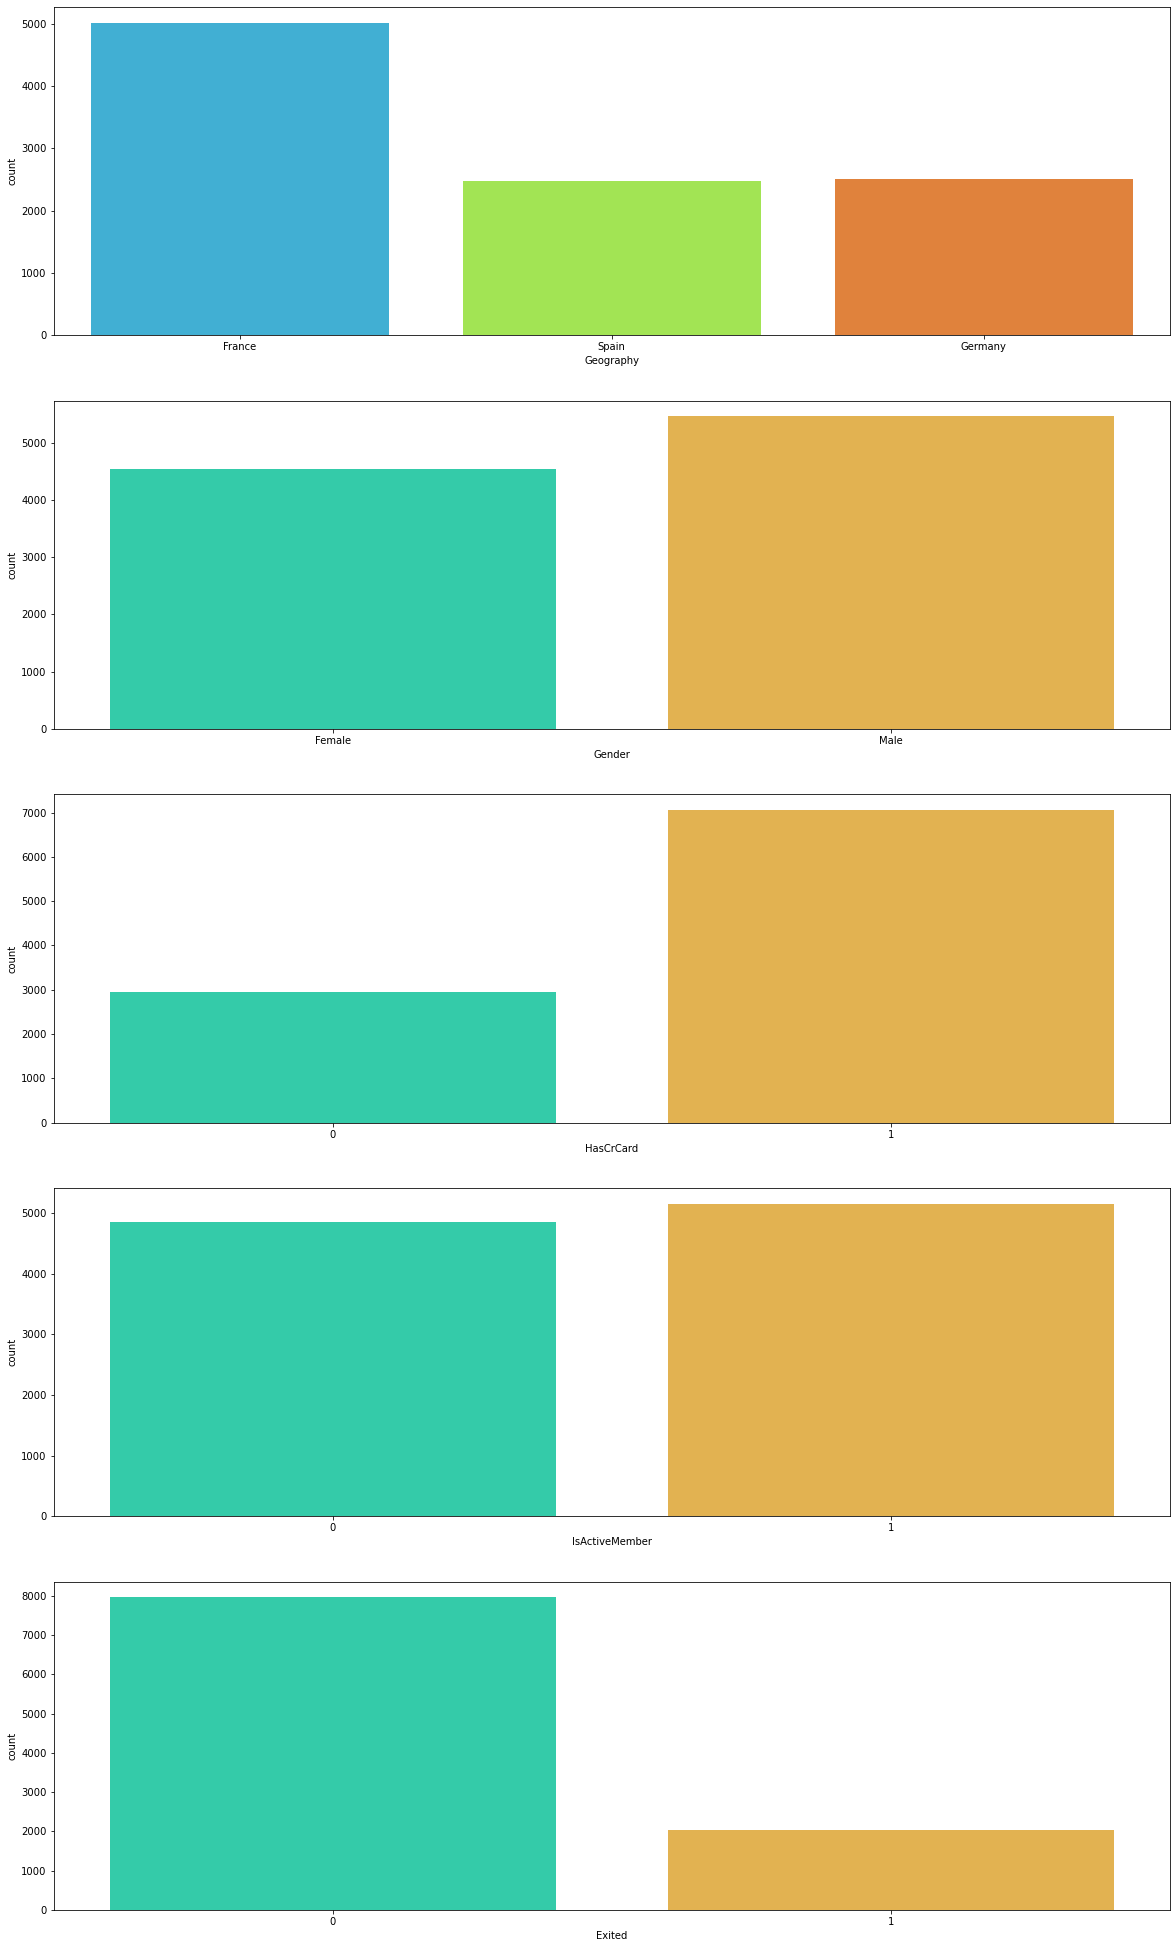

In [34]:
fig,axes= plt.subplots(nrows=5, ncols=1, figsize=(20,35))
for col in catergoricals:
    sns.countplot(data=df, x=col, ax=axes[catergoricals.index(col)], palette= 'turbo')
plt.show()

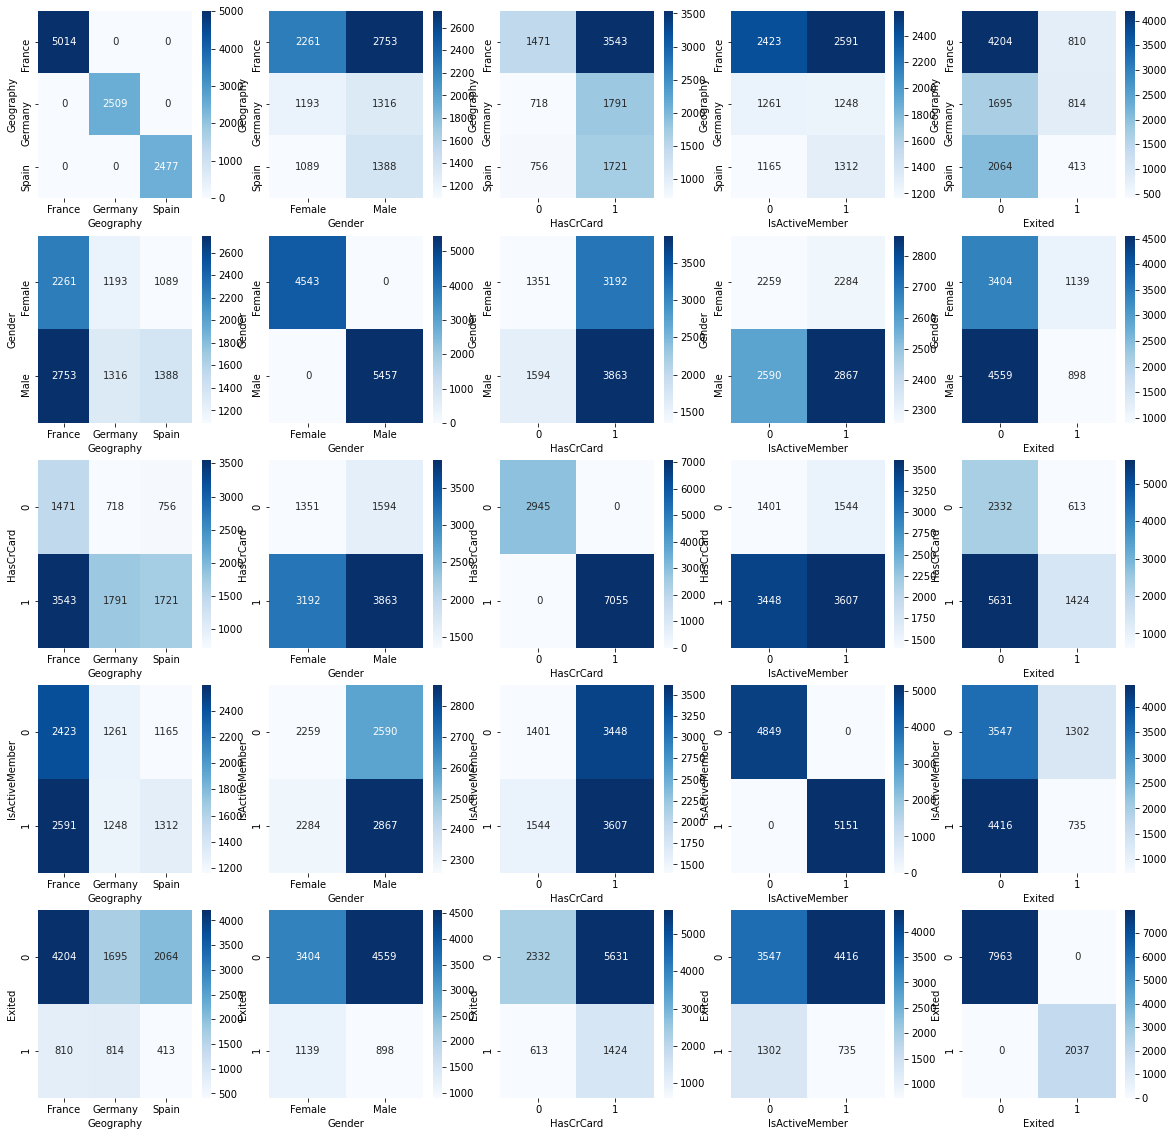

In [35]:
fig, axes= plt.subplots(nrows=5, ncols=5, figsize= (20,20))
for index in range(25):
    i,j= index//5,index%5
    sns.heatmap(pd.crosstab(df[catergoricals[i]], df[catergoricals[j]]), annot=True, annot_kws={'fontsize':10}, fmt='2', ax=axes[i,j],cmap='Blues')
plt.show()

In [36]:
df.shape

(10000, 11)

In [37]:
# sns.pairplot(df, hue='Exited')
# plt.show()

In [38]:
df=pd.get_dummies(df,drop_first=True)

In [39]:
df.shape

(10000, 12)

In [40]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Logistic Regression


In [41]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


In [42]:
y=df['Exited']
x=df.drop(columns='Exited')


In [43]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 42)

In [44]:
x_test.shape


(2500, 11)

In [45]:
scaler= RobustScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [46]:
x_test_scaled.shape

(2500, 11)

In [47]:
from sklearn.linear_model import LogisticRegressionCV
logreg= LogisticRegressionCV()

In [48]:
%%time
logreg.fit(x_train_scaled,y_train)
y_train_pred= logreg.predict(x_train_scaled)
y_test_pred=logreg.predict(x_test_scaled)

Wall time: 351 ms


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print('confusion matrix_train\n')
print(confusion_matrix(y_train,y_train_pred),'\n\n')
print('\nconfusion matrix_test\n')
print(confusion_matrix(y_test,y_test_pred))

confusion matrix_train

[[5752  208]
 [1199  341]] 



confusion matrix_test

[[1937   66]
 [ 404   93]]


In [51]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

81.2

In [52]:
#RESULT
print(f'Accuracy using Logistic Regression is ',{accuracy_percentage})


Accuracy using Logistic Regression is  {81.2}


In [53]:
print('Classification report- Y_test\n---- LOGISTIC REGRESSION')
print(classification_report(y_test,y_test_pred))

Classification report- Y_test
---- LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2003
           1       0.58      0.19      0.28       497

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



In [54]:
results_score_Logistic_Regression= logreg.score(x_test_scaled, y_test)
results_score_Logistic_Regression

0.812

# using gridsearchcv with k neighbors


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [56]:
optimizer= GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors' : [2,3,5,6,8,9,15,12,21]}, scoring='accuracy',cv=5)


In [57]:
%%time
optimizer.fit(x_train_scaled,y_train)

Wall time: 6.11 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 6, 8, 9, 15, 12, 21]},
             scoring='accuracy')

In [58]:
optimizer.best_score_

0.8413333333333334

In [59]:
optimizer.best_params_

{'n_neighbors': 9}

In [60]:
optimized_knn=  KNeighborsClassifier(n_neighbors=9)

In [61]:
optimized_knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [62]:
print(f"Training Confusion matrix:\n{confusion_matrix(y_train, optimized_knn.predict(x_train_scaled))}\n\n")
print(f"Testing Confusion matrix:\n{confusion_matrix(y_test, optimized_knn.predict(x_test_scaled))}\n\n")

Training Confusion matrix:
[[5798  162]
 [ 881  659]]


Testing Confusion matrix:
[[1938   65]
 [ 319  178]]




In [63]:
print("Training Classification Report:\n")
print(classification_report(y_train, optimized_knn.predict(x_train_scaled)))
print("\n\nTesting Classification Report:\n----- GRIDSEARCHCV FOR KNEIGHBORS")
print(classification_report(y_test, optimized_knn.predict(x_test_scaled)))

Training Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5960
           1       0.80      0.43      0.56      1540

    accuracy                           0.86      7500
   macro avg       0.84      0.70      0.74      7500
weighted avg       0.85      0.86      0.84      7500



Testing Classification Report:
----- GRIDSEARCHCV FOR KNEIGHBORS
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2003
           1       0.73      0.36      0.48       497

    accuracy                           0.85      2500
   macro avg       0.80      0.66      0.70      2500
weighted avg       0.83      0.85      0.82      2500



In [64]:
results_k_neighbors_9 = optimized_knn.score(x_test_scaled, y_test)
results_k_neighbors_9

0.8464

In [65]:
print(f'accuracy with K_neighbors we get 85% and score:',{results_k_neighbors_9})

accuracy with K_neighbors we get 85% and score: {0.8464}


# 100 DECISION TREE WITH bagging 

In [66]:
%%time 
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt_bag = BaggingClassifier(base_estimator=dt, n_estimators=100, n_jobs=-1)

dt_bag.fit(x_train_scaled,y_train)


results_score_100_decision_tree_with_bagging = dt_bag.score(x_test_scaled, y_test)
results_score_100_decision_tree_with_bagging

Wall time: 4.77 s


0.8608

In [67]:
print(f'100 decision tree with score of :', {results_score_100_decision_tree_with_bagging})

100 decision tree with score of : {0.8608}


# using Random forest


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train_scaled,y_train)
result_score_random_forest= rf.score(x_test_scaled,y_test)
result_score_random_forest

0.8672

In [69]:
print(f'result_score_random_forest',{result_score_random_forest})

result_score_random_forest {0.8672}


# using Neural Network

In [70]:
from pandas.plotting import scatter_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

In [71]:
%%time
classifier = Sequential()
#model.add(layers.Flatten(input_shape=np.shape(X_train)))
classifier.add(Dense(units= 6,input_dim = 11, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
                   
classifier.fit(x_train_scaled, y_train, epochs = 20, batch_size = 10)

y_pred = classifier.predict(x_test_scaled)
y_pred = (y_pred > 0.5)

Epoch 1/20
750/750 [==============================] - 1s 704us/step - loss: 0.5142 - accuracy: 0.7941
Epoch 2/20
750/750 [==============================] - 1s 669us/step - loss: 0.4473 - accuracy: 0.7947
Epoch 3/20
750/750 [==============================] - 1s 741us/step - loss: 0.4394 - accuracy: 0.7947
Epoch 4/20
750/750 [==============================] - 0s 645us/step - loss: 0.4357 - accuracy: 0.7947
Epoch 5/20
750/750 [==============================] - 1s 732us/step - loss: 0.4327 - accuracy: 0.7947
Epoch 6/20
750/750 [==============================] - 1s 710us/step - loss: 0.4296 - accuracy: 0.7947
Epoch 7/20
750/750 [==============================] - 1s 885us/step - loss: 0.4256 - accuracy: 0.8003
Epoch 8/20
750/750 [==============================] - 1s 786us/step - loss: 0.4216 - accuracy: 0.8215
Epoch 9/20
750/750 [==============================] - 1s 756us/step - loss: 0.4189 - accuracy: 0.8232
Epoch 10/20
750/750 [==============================] - 1s 871us/step - loss: 0.416

In [72]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [73]:
print('accuracy with CNN: 0.8315')

accuracy with CNN: 0.8315


# Mlens superlearner

In [74]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [75]:
%%time
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
GBC = GradientBoostingClassifier(n_estimators = 100)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([ RF, GBC, clf_XGB],
                      ['Random Forest',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sk.model_selection.cross_val_score(clf, x_train_scaled, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(x_train_scaled, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sk.metrics.accuracy_score(clf.predict(x_test_scaled), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.859 (+/- 0.006) [Random Forest]
Test Accuracy: 0.8588 
Train CV Accuracy: 0.861 (+/- 0.007) [Gradient Boosting]
Test Accuracy: 0.8680 
Train CV Accuracy: 0.847 (+/- 0.007) [XGBoost]
Test Accuracy: 0.8632 
Wall time: 11.1 s


In [76]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score


[MLENS] backend: threading


In [77]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)


In [78]:
%%time
ensemble.add([clf_XGB, GBC, RF])
ensemble.add_meta(GradientBoostingClassifier())
ensemble.fit(x_train_scaled, y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02
Wall time: 2.79 s


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...110E4C0>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x000001E08110E4C0>,
       shuffle=False, verbose=2)

In [79]:
#pred_vals = ensemble.predict(X_test)
print ("Accuracy - Train : ", sk.metrics.accuracy_score(ensemble.predict(x_train_scaled), y_train))
print ("Accuracy - Test : ", sk.metrics.accuracy_score(ensemble.predict(x_test_scaled), y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9398666666666666

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.8604


In [80]:

print("Fit data:\n%r" % ensemble.data)

Fit data:
                                       score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  gradientboostingclassifier       0.86     0.00  1.60  0.01  0.01  0.00
layer-1  randomforestclassifier           0.86     0.00  1.49  0.02  0.15  0.01
layer-1  xgbclassifier                    0.85     0.01  1.31  0.00  0.01  0.00



In [81]:
print('score with mlens super learner : Random forest + xgboost+ gradient boost: 0.86')

score with mlens super learner : Random forest + xgboost+ gradient boost: 0.86


In [82]:
print('result_score_random_forest',result_score_random_forest,'\n')
print('results_score_k_neighbors_9',results_k_neighbors_9,'\n')
print('results_score_100_decision_tree_with_bagging',results_score_100_decision_tree_with_bagging,'\n')
print('results_score_Logistic_classification',results_score_Logistic_Regression,'\n')
print('score with mlens super learner : Random forest + xgboost+ gradient boost: 0.86','\n')
print('accuracy with CNN: 0.8315')

result_score_random_forest 0.8672 

results_score_k_neighbors_9 0.8464 

results_score_100_decision_tree_with_bagging 0.8608 

results_score_Logistic_classification 0.812 

score with mlens super learner : Random forest + xgboost+ gradient boost: 0.86 

accuracy with CNN: 0.8315
